## Подготовка данных

### Описание данных

*Определение перспективного тарифа для телеком компании*

Для корректировки рекламного бюджета федерального оператора сотовой связи необходимо проанализировать на небольшой выборке поведение клиентов для двух тарифных планов: «Смарт» и «Ультра». Данные предоставлены за 2018 г.

Основные задачи: 
1. Проанализировать поведение клиентов;
2. Сравнить 2 тарифа; 
3. Выбрать наиболее перспективный.

Таблица users (информация о пользователях):
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

Таблица calls (информация о звонках):
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

Таблица tariffs (информация о тарифах):
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Загрузка данных

In [37]:
# импорт библиотеки pandas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#настройка pandas
pd.set_option('display.float_format', '{:,.2f}'.format)
# выгрузка файлов с данными 
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [38]:
# чтение файлов с данными 
table = [calls, internet, messages, tariffs, users]
for name in table:
    display(name.head())
    display()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В нескольких таблицах представлена информация о пользователях (таблица users), информация о звонках (таблица calls), информация о сообщениях (таблица messages), информация об интернет-сессиях(таблица internet), информация о тарифах «Смарт» и «Ультра» (таблица tariffs).
Тариф «Смарт»
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

Перепроверим данные для трафика и звонков на нулевые значения, построив гистограммы.

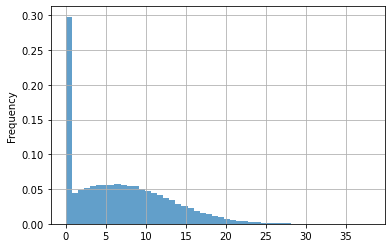

In [39]:
# построение гистограммы для таблицы calls столбца 'duration'
calls['duration'].plot(kind='hist', bins=50, grid=True, alpha=0.7, density=True);

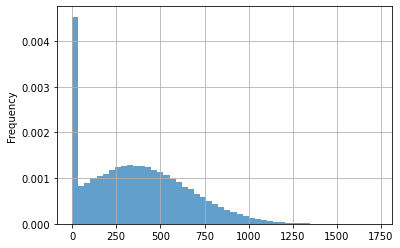

In [40]:
# построение гистограммы для таблицы internet столбца 'mb_used'
internet['mb_used'].plot(kind='hist', bins=50, grid=True, alpha=0.7, density=True);

При построении гистограмм обнаружено большое количество нулевых значений в таблице calls столбца 'duration' и таблице internet 'mb_used'.

## Предобработка данных

In [41]:
# создание функции для получения общей информации о данных в таблицах
def info_table(table):
    return table.info(), table.head(), table.duplicated().sum()

display(info_table(calls))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


(None,
        id   call_date  duration  user_id
 0  1000_0  2018-07-25      0.00     1000
 1  1000_1  2018-08-17      0.00     1000
 2  1000_2  2018-06-11      2.85     1000
 3  1000_3  2018-09-21     13.80     1000
 4  1000_4  2018-12-15      5.18     1000,
 0)

In [42]:
display(info_table(calls))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


(None,
        id   call_date  duration  user_id
 0  1000_0  2018-07-25      0.00     1000
 1  1000_1  2018-08-17      0.00     1000
 2  1000_2  2018-06-11      2.85     1000
 3  1000_3  2018-09-21     13.80     1000
 4  1000_4  2018-12-15      5.18     1000,
 0)

Тип данных в столбце 'call_date' (дата звонка) object. Для работы с датой необходимо привести данные к типу datetime64. Для этого воспользуемся методом to_datetime. Аналогичную задачу выполним для столбца 'session_date' таблицы internet, столбца 'message_date' таблицы messages, столбца 'reg_date' таблицы users, столбца 'churn_date' таблицы users.

In [43]:
# перевод из строки в дату и время столбца 'call_date' таблицы calls
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
# перевод из строки в дату и время столбца 'session_date' таблицы internet
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
# перевод из строки в дату и время столбца 'message_date' таблицы messages
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
# перевод из строки в дату и время столбца 'reg_date' таблицы users
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
# перевод из строки в дату и время столбца 'churn_date' таблицы users
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Каждый звонок округляется до минуты отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Поэтому округляем значения в столбце 'duration' таблицы calls в большую сторону до целого значения.

In [44]:
# импортирование модуля 
import math
# округление в большую сторону до целого значения
calls['duration'] = calls['duration'].apply(math.ceil)
# проверка результата
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


### Подсчет количества израсходованных минут разговора по месяцам

Добавим в таблицу calls столбец 'month' для дальнешей группировки пользователя по месяцу.

In [45]:
# выделение месяца из даты
calls['month'] = pd.DatetimeIndex(calls['call_date']).month 
# проверка результата
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Посчитаем для каждого пользователя количество израсходованных минут разговора по месяцам.

In [46]:
# формирование сводной таблицы для получения суммы израсходованных минут
calls_pivot_sum = calls.pivot_table(index = ['user_id', 'month'], 
values = 'duration', aggfunc = 'sum')
# проверка результата
calls_pivot_sum

duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466
...                 ...
1498    10          247
1499    9            70
        10          449
        11          612
        12          492

[3174 rows x 1 columns]

### Подсчет количества сделанных звонков по месяцам

Посчитаем для каждого пользователя количество сделанных звонков по месяцам.

In [47]:
# формирование сводной таблицы для получения количества сделанных звонков
calls_pivot_count = calls.pivot_table(index = ['user_id', 'month'], 
values = 'call_date', aggfunc = 'count')
# изменение названия столбцов в таблице messages_pivot
calls_pivot_count.set_axis(['call_count'],axis = 'columns',inplace = True)
# проверка результата
calls_pivot_count

call_count
user_id month            
1000    5              22
        6              43
        7              47
        8              52
        9              58
...                   ...
1498    10             41
1499    9               9
        10             68
        11             74
        12             69

[3174 rows x 1 columns]

Передадим методу groupby аргументы 'sum' и 'count' и создадим агрегированную таблицу в одной ячейке.

In [48]:
# формирование сводной таблицы для получения суммы и количества сделанных звонков
calls_pivot_sum_count = calls.groupby(['user_id','month']).agg({'duration' : ('sum','count')}).reset_index()
# проверка результата
calls_pivot_sum_count

user_id month duration      
                        sum count
0       1000     5      159    22
1       1000     6      172    43
2       1000     7      340    47
3       1000     8      408    52
4       1000     9      466    58
...      ...   ...      ...   ...
3169    1498    10      247    41
3170    1499     9       70     9
3171    1499    10      449    68
3172    1499    11      612    74
3173    1499    12      492    69

[3174 rows x 4 columns]

### Подсчет количества отправленных сообщений по месяцам

Посчитаем для каждого пользователя количество отправленных сообщений по месяцам. Для этого необходимо добавить в таблицу messages столбец 'month' для дальнешей группировки пользователя по месяцу.

In [49]:
# получение месяца из даты
messages['month'] = pd.DatetimeIndex(messages['message_date']).month 
# формирование сводной таблицы для получения количества отправленных сообщений по месяцам
messages_pivot = messages.pivot_table(index = ['user_id', 'month'], 
values = 'message_date', aggfunc = 'count')
# изменение названия столбцов в таблице messages_pivot
messages_pivot.set_axis(['message_count'],axis = 'columns',inplace = True)
# проверка результата
messages_pivot

message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
...                      ...
1498    10                42
1499    9                 11
        10                48
        11                59
        12                66

[2717 rows x 1 columns]

### Подсчет объема израсходованного интернет-трафика по месяцам

Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону.

In [50]:
# получение месяца из даты
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
# формирование сводной таблицы для получения объема израсходованного интернет-трафика по месяцам
internet_pivot = internet.pivot_table(index = ['user_id', 'month'], 
values = 'mb_used', aggfunc = 'sum')
# добавление столбца 'gb_used' путем преобразования данных столбца 'mb_used' из мегабайт в гигабайты
internet_pivot['gb_used'] = (internet_pivot['mb_used'] / 1024).apply(math.ceil)
# проверка результата
internet_pivot.head()

mb_used  gb_used
user_id month                   
1000    5      2,253.49        3
        6     23,233.77       23
        7     14,003.64       14
        8     14,055.93       14
        9     14,568.91       15

Объединим датасеты calls_pivot и internet_pivot по колонке 'user_id', 'month', а также датасеты calls_pivot и internet_pivot по колонке 'user_id', 'month'.

In [51]:
# cлияние двух датасетов calls_pivot_sum и calls_pivot_count
data = calls_pivot_sum.merge(calls_pivot_count, on=['user_id','month'], how='outer')
# cлияние двух датасетов data и internet_pivot
data = data.merge(internet_pivot, on=['user_id','month'], how='outer')
# cлияние двух датасетов data и messages_pivot
data = data.merge(messages_pivot, on=['user_id','month'], how='outer')
# проверка результата
data

duration  call_count   mb_used  gb_used  message_count
user_id month                                                        
1000    5        159.00       22.00  2,253.49     3.00          22.00
        6        172.00       43.00 23,233.77    23.00          60.00
        7        340.00       47.00 14,003.64    14.00          75.00
        8        408.00       52.00 14,055.93    14.00          81.00
        9        466.00       58.00 14,568.91    15.00          57.00
...                 ...         ...       ...      ...            ...
1489    8           NaN         NaN 11,050.56    11.00          17.00
        9           NaN         NaN 17,206.30    17.00          32.00
        10          NaN         NaN 19,559.44    20.00          21.00
        11          NaN         NaN 17,491.56    18.00          20.00
        12          NaN         NaN 17,322.51    17.00          35.00

[3214 rows x 5 columns]

### Подсчет помесячной выручки с каждого пользователя

Для расчета помесячной выручки с каждого пользователя составим общую сводную таблицу со следующей информацией о пользователе: суммарная длительность звонков в минутах по месяцам, количество отправленных сообщений по месяцам, объём потраченного за сессию интернет-трафика. 

Также необходимо добавить информацию о тарифе каждого пользователя: количество минут разговора в месяц, включённых в абонентскую плату, количество сообщений в месяц, включённых в абонентскую плату, объём интернет-трафика, включённого в абонентскую плату, стоимость минуты разговора сверх тарифного пакета, стоимость отправки сообщения сверх тарифного пакета, стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета. 

Объединим датасеты data и users по колонке 'user_id'.

In [52]:
# cлияние двух датасетов data и users 
data = data.reset_index().merge(users[['city', 'user_id', 'tariff']], on='user_id', how='outer')
# проверка результата
data

,user_id,month,duration,call_count,mb_used,gb_used,message_count,city,tariff
0,1000,5.00,159.00,22.00,"2,253.49",3.00,22.00,Краснодар,ultra
1,1000,6.00,172.00,43.00,"23,233.77",23.00,60.00,Краснодар,ultra
2,1000,7.00,340.00,47.00,"14,003.64",14.00,75.00,Краснодар,ultra
3,1000,8.00,408.00,52.00,"14,055.93",14.00,81.00,Краснодар,ultra
4,1000,9.00,466.00,58.00,"14,568.91",15.00,57.00,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...
3211,1489,10.00,NaN,NaN,"19,559.44",20.00,21.00,Санкт-Петербург,smart
3212,1489,11.00,NaN,NaN,"17,491.56",18.00,20.00,Санкт-Петербург,smart
3213,1489,12.00,NaN,NaN,"17,322.51",17.00,35.00,Санкт-Петербург,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,Волжский,ultra


In [53]:
# изменение названия столбцов в таблице tariffs
tariffs.set_axis(['messages_included','mb_per_month_included','minutes_included', 'rub_monthly_fee', 'rub_per_gb', 
                  'rub_per_message', 'rub_per_minute', 'tariff'],axis = 'columns',inplace = True)
# проверка результата
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Соединение таблицы tariffs и data.

In [54]:
# cлияние двух датасетов data и tariffs
data = data.reset_index().merge(tariffs, on='tariff', how='outer')
# создание столбца 'gb_per_month_included' в таблицу data
data['gb_per_month_included'] = data['mb_per_month_included']/1024
# проверка результата
data

,index,user_id,month,duration,call_count,mb_used,gb_used,message_count,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,0,1000,5.00,159.00,22.00,"2,253.49",3.00,22.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.00
1,1,1000,6.00,172.00,43.00,"23,233.77",23.00,60.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.00
2,2,1000,7.00,340.00,47.00,"14,003.64",14.00,75.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.00
3,3,1000,8.00,408.00,52.00,"14,055.93",14.00,81.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.00
4,4,1000,9.00,466.00,58.00,"14,568.91",15.00,57.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,3210,1489,9.00,NaN,NaN,"17,206.30",17.00,32.00,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.00
3212,3211,1489,10.00,NaN,NaN,"19,559.44",20.00,21.00,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.00
3213,3212,1489,11.00,NaN,NaN,"17,491.56",18.00,20.00,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.00
3214,3213,1489,12.00,NaN,NaN,"17,322.51",17.00,35.00,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.00


Подсчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика).

In [55]:
# создание функции для подсчета переплаты пользователей 
def get_revenue(row):
    # считаем овердрафты
    minutes_over = (row['duration'] - row['minutes_included']) *  row['rub_per_minute']
    message_over = (row['message_count'] - row['messages_included']) *  row['rub_per_message']
    gb_over = (row['gb_used'] - row['gb_per_month_included']) *  row['rub_per_gb']
    # убираем отрицательные овердрафты
    if minutes_over < 0: 
        minutes_over = 0
    if message_over < 0:
        message_over = 0
    if gb_over < 0:
        gb_over = 0
        # считаем выручку
    return minutes_over + message_over + gb_over
data['revenue'] = data.apply(get_revenue, axis = 1)

In [56]:
# создание функции для подсчета суммы переплаты пользователей и оплаты ежемесячной абонентской платы в рублях
def income_for_the_month(row):
    income = row['revenue'] + row['rub_monthly_fee']
    return income
data['income_for_the_month'] = data.apply(income_for_the_month, axis=1)

In [57]:
# проверка результата
data.head(10)

,index,user_id,month,duration,call_count,mb_used,gb_used,message_count,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,revenue,income_for_the_month
0,0,1000,5.00,159.00,22.00,"2,253.49",3.00,22.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.00,0.00,"1,950.00"
1,1,1000,6.00,172.00,43.00,"23,233.77",23.00,60.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.00,0.00,"1,950.00"
2,2,1000,7.00,340.00,47.00,"14,003.64",14.00,75.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.00,0.00,"1,950.00"
3,3,1000,8.00,408.00,52.00,"14,055.93",14.00,81.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.00,0.00,"1,950.00"
4,4,1000,9.00,466.00,58.00,"14,568.91",15.00,57.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.00,0.00,"1,950.00"
5,5,1000,10.00,350.00,57.00,"14,702.49",15.00,73.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.00,0.00,"1,950.00"
6,6,1000,11.00,338.00,43.00,"14,756.47",15.00,58.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.00,0.00,"1,950.00"
7,7,1000,12.00,333.00,46.00,"9,817.61",10.00,70.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.00,0.00,"1,950.00"
8,17,1003,8.00,380.00,55.00,"8,565.21",9.00,37.00,Москва,ultra,1000,30720,3000,1950,150,1,1,30.00,0.00,"1,950.00"
9,18,1003,9.00,961.00,134.00,"12,468.87",13.00,91.00,Москва,ultra,1000,30720,3000,1950,150,1,1,30.00,0.00,"1,950.00"


## Анализ и описание данных

In [58]:
# импорт библиотеки
from scipy import stats as st
import numpy as np

In [59]:
# удаление пропущенных значений
data.dropna(subset = ['month'], inplace = True)
# заполнение пропущенных значений
data = data.fillna(0)
# перевод вещественных чисел в целые в столбце 'month'
data['month'] = data['month'].astype('int')
# просмотр уникальных значений и их количества столбца 'month'
data['month'].value_counts()

12    476
11    450
10    417
9     375
8     342
7     292
6     248
5     208
4     167
3     114
2      82
1      43
Name: month, dtype: int64

In [60]:
# разделим клиентов по тарифам и определим их поведение
clients_smart = data.query('tariff == "smart"')
clients_ultra = data.query('tariff == "ultra"')

Опишем поведение клиентов оператора, исходя из выборки. Расчитаем сколько минут разговора требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение.

In [61]:
# посчитаем среднее количество продолжительности звонков тарифного плана smart
print('Среднее количество продолжительности звонков тарифного плана smart', clients_smart['duration'].mean())
# посчитаем дисперсию продолжительности звонков тарифного плана smart
smart_var_duration = np.var(clients_smart['duration'])
print('Дисперсия продолжительности звонков тарифного плана smart', smart_var_duration)
# посчитаем стандартное отклонение продолжительности звонков тарифного плана smart
smart_sigma_duration = np.sqrt(smart_var_duration)
print('Стандартное отклонение продолжительности звонков тарифного плана smart', smart_sigma_duration)
# посчитаем среднее количество продолжительности звонков тарифного плана smart
print('Среднее количество продолжительности звонков тарифного плана ultra', clients_ultra['duration'].mean())
# посчитаем дисперсию продолжительности звонков тарифного плана ultra
ultra_var_duration = np.var(clients_ultra['duration'])
print('Дисперсия продолжительности звонков тарифного плана ultra', ultra_var_duration)
# посчитаем стандартное отклонение продолжительности звонков тарифного плана ultra
ultra_sigma_duration = np.sqrt(ultra_var_duration)
print('Стандартное отклонение продолжительности звонков тарифного плана ultra', ultra_sigma_duration)

Среднее количество продолжительности звонков тарифного плана smart 417.9349484073576
Дисперсия продолжительности звонков тарифного плана smart 36203.066652094654
Стандартное отклонение продолжительности звонков тарифного плана smart 190.27103471651867
Среднее количество продолжительности звонков тарифного плана ultra 526.6233502538071
Дисперсия продолжительности звонков тарифного плана ultra 100771.22361720211
Стандартное отклонение продолжительности звонков тарифного плана ultra 317.444835549741


Построим гистограммы.

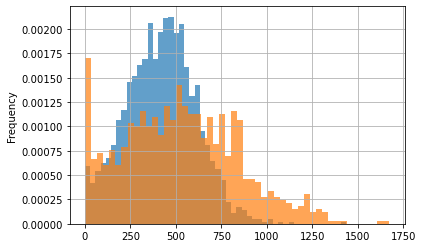

In [62]:
clients_smart['duration'].plot(kind='hist', bins=50, grid=True, alpha=0.7, density=True)
clients_ultra['duration'].plot(kind='hist', bins=50, grid=True, alpha=0.7, density=True);

У пользователей тарифа ultra дисперсия и cтандартное отклонение звонков значительно выше, чем дисперсия и cтандартное отклонение звонков тарифного плана smart. Также следует отметить, что среднее количество продолжительности звонков 418 минут тарифного плана smart близко к максимальной границе тарифа. Среднее количество продолжительности звонков тарифного плана ultra составляет 526 минут, что значительно меньше заявленного в тарифном плане максимального значения количества минут разговора.

Расчитаем сколько сообщений требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение.

In [63]:
# посчитаем среднее количество сообщений тарифного плана smart
print('Среднее количество сообщений тарифного плана smart', clients_smart['message_count'].mean())
# посчитаем дисперсию количества сообщений тарифного плана smart
smart_var_message_count = np.var(clients_smart['message_count'])
print('Дисперсия количества сообщений тарифного плана smart', smart_var_message_count)
# посчитаем стандартное отклонение количества сообщений тарифного плана smart
smart_sigma_message_count = np.sqrt(smart_var_message_count)
print('Стандартное отклонение количества сообщений тарифного плана smart', smart_sigma_message_count)
# посчитаем среднее количество сообщений тарифного плана ultra
print('Среднее количество сообщений тарифного плана ultra', clients_ultra['message_count'].mean())
# посчитаем дисперсию количества сообщений тарифного плана ultra
ultra_var_message_count = np.var(clients_ultra['message_count'])
print('Дисперсия количества сообщений тарифного плана ultra', ultra_var_message_count)
# посчитаем стандартное отклонение количества сообщений тарифного плана ultra
ultra_sigma_message_count = np.sqrt(ultra_var_message_count)
print('Стандартное отклонение количества сообщений тарифного плана ultra', ultra_sigma_message_count)

Среднее количество сообщений тарифного плана smart 33.384028712427096
Дисперсия количества сообщений тарифного плана smart 796.455482917076
Стандартное отклонение количества сообщений тарифного плана smart 28.221542886898938
Среднее количество сообщений тарифного плана ultra 49.36345177664975
Дисперсия количества сообщений тарифного плана ultra 2282.946075394891
Стандартное отклонение количества сообщений тарифного плана ultra 47.7801849661017


Построим гистограмму.

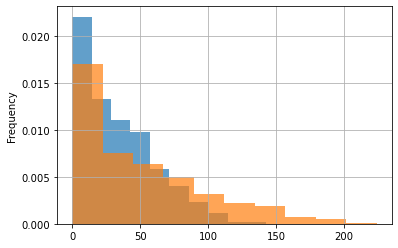

In [64]:
clients_smart['message_count'].plot(kind='hist', grid=True, alpha=0.7, density=True)
clients_ultra['message_count'].plot(kind='hist', grid=True, alpha=0.7, density=True);

Для обоих тарифов характерна скошенность набора данных вправо. Можно сделать вывод, что отправкой сообщений клиенты обоих тарифов пользуются менее активно, чем звонкам. Среднее количество сообщений, дисперсия и стандартное отклонение тарифа ultra больше, чем аналогичные данные тарифа smart. В тарифном плане smart среднее количество сообщений 33 при максимальных 50, входящих в тариф. А в тарифном плане ultra  среднее количество сообщений 48 при максимальных 1000 сообщений, включенных в тариф. 

Расчитаем какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение.

In [65]:
# посчитаем средний объём интернет-трафика тарифного плана smart
print('Средний объём интернет-трафика тарифного плана smart', clients_smart['gb_used'].mean())
# посчитаем дисперсию объёма интернет-трафика тарифного плана smart
smart_var_mb_used = np.var(clients_smart['gb_used'])
print('Дисперсия объёма интернет-трафика тарифного плана smart', smart_var_mb_used)
# посчитаем стандартное отклонение объёма интернет-трафика тарифного плана smart
smart_sigma_mb_used = np.sqrt(smart_var_mb_used)
print('Стандартное отклонение объёма интернет-трафика тарифного плана smart', smart_sigma_mb_used)
# посчитаем средний объём интернет-трафика тарифного плана ultra
print('Средний объём интернет-трафика тарифного плана ultra', clients_ultra['gb_used'].mean())
# посчитаем дисперсию объёма интернет-трафика тарифного плана ultra
ultra_var_mb_used = np.var(clients_ultra['gb_used'])
print('Дисперсия объёма интернет-трафика тарифного плана ultra', ultra_var_mb_used)
# посчитаем стандартное отклонение объёма интернет-трафика тарифного плана ultra
ultra_sigma_mb_used = np.sqrt(ultra_var_mb_used)
print('Стандартное отклонение объёма интернет-трафика тарифного плана ultra', ultra_sigma_mb_used)

Средний объём интернет-трафика тарифного плана smart 16.328847016599372
Дисперсия объёма интернет-трафика тарифного плана smart 33.01388745483741
Стандартное отклонение объёма интернет-трафика тарифного плана smart 5.7457712671874965
Средний объём интернет-трафика тарифного плана ultra 19.494416243654822
Дисперсия объёма интернет-трафика тарифного плана ultra 96.99311602978705
Стандартное отклонение объёма интернет-трафика тарифного плана ultra 9.8485083149575


<AxesSubplot:ylabel='Frequency'>

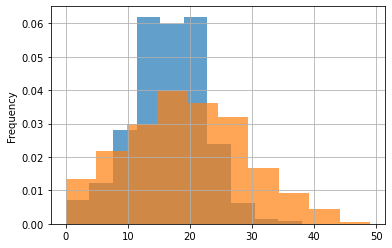

In [66]:
clients_smart['gb_used'].plot(kind='hist', grid=True, alpha=0.7, density=True)
clients_ultra['gb_used'].plot(kind='hist', grid=True, alpha=0.7, density=True)

Средний объём интернет-трафика тарифного плана smart примерно 16 Гб, в связи с тем, что в тарифном плане включено 15 Гб интернет-трафика. Большинство пользователей стараются держать себя в рамках тарифа. У пользователей тарифа ultra данные более "размазаны" относительно среднего. Это обосновано большим количеством Гб в пакете, также стоит отметить, что среднее значение использованных Гб близки.

**Выводы**

* Пользователи тарифа smart пытаются подстроиться под условия пакета. 
* Дисперсия и стандартное отклонение длительности звонков, отправленных сообщений, использованных Гб тарифного плана ultra значительно выше, чем дисперсия и cтандартное отклонение длительности звонков, отправленных сообщений, использованных Гб тарифного плана smart. Из этого можно сделать вывод, что данные пользователей тарифа ultra более размыты, а следовательно, их поведение менее систематизировано, чем поведение пользователей на тарифе smart. 
* Пользователи пакета ultra переплачивают за услуги, которыми не пользуются.

## Проверка гипотез

Проверим две исследовательские гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


Так как генеральные совокупности не зависят друг от друга, выборочные средние распределены нормально, значит можно использовать специальный метод stats.ttest_ind для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Выборки (средняя выручка пользователей тарифа «Ультра» и пользователей тарифа «Смарт», средняя выручка пользователей из г. Москвы и пользователей из других регионов) разного размера и дисперсии у совокупностей различные, следовательно, укажем параметр equal_var в методе как False.

Для проверки исследовательской гипотезы, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, необходимо составить нулевую гипотезу и альтернативную. Это утверждение, которое принимается верным, если отбрасывается нулевая гипотеза.
Нулевая гипотеза: средняя выручка по тарифам равна (H₀ всегда формулируется так, чтобы использовать знак равенства).
Альтернативная гипотеза: средняя выручка по тарифам не равна.

In [67]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    clients_smart['income_for_the_month'], 
    clients_ultra['income_for_the_month'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4731065642477575e-37
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, так как экспериментальные данные очень маловероятны при условии, что гипотеза верна. Значит, средняя выручка по тарифам не равна.

Проверим исследовательскую гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Нулевая гипотеза: средняя выручка пользователей из Москвы и пользователей из других регионов равна.
Альтернативная гипотеза: средняя выручка пользователей из Москвы и пользователей из других регионов не равна.

In [68]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    data.query('city == "Москва"')['income_for_the_month'], 
    data.query('city != "Москва"')['income_for_the_month'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.9777283495166826
Не получилось отвергнуть нулевую гипотезу


Итак, p-значение значительно выше установленного критического уровня статистической значимости, вероятность получить верные данные очень высока, гипотезу не отвергаем, следовательно, уверенность в том, что гипотеза верна, повысилась.

## Вывод

Проанализированы выборки данных пользователей двух тарифов, рассчитаны и сравнены среднее количество, дисперсия и стандартное отклонение параметров длительности звонков, отправленных сообщений, использованных Гб. Можно сделать вывод, что поведение пользователей тарифа smart более систематизировано, чем поведение пользователей тарифа ultra.

В ходе работы также были проверены две исследовательские гипотезы. Гипотеза, что "средняя выручка по тарифам равна" была отвергнута и принята альтернативная, что "средняя выручка по тарифам не равна". Гипотезу "средняя выручка пользователей из Москвы и пользователей из других регионов равна" не получилось отвергнуть, так как данные гипотезе не противоречат.